In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2


In [239]:
#This code prevents the kernel from stopping when XGBoost is running
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

In [154]:
pd.set_option('display.max_columns', 500)

In [155]:
df = pd.read_csv('cleaned_df.csv')

In [156]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,Smokes_1.0,IUD_1.0,STDs_1.0,STDs:condylomatosis_1.0,STDs:vaginal condylomatosis_1.0,STDs:vulvo-perineal condylomatosis_1.0,STDs:syphilis_1.0,STDs:pelvic inflammatory disease_1.0,STDs:genital herpes_1.0,STDs:molluscum contagiosum_1.0,STDs:HIV_1.0,STDs:Hepatitis B_1.0,STDs:HPV_1.0,Dx_1,Dx:Cancer_1,Dx:CIN_1,Dx:HPV_1,Hinselmann_1,Schiller_1,Citology_1,Biopsy_1,Smoke > 10 years_1,Been Pregnant_1,Known First Sexual Intercourse Age_1,> 1 STD_1,>10 Years Sexual Activity_1,IUD >= 5 Years_1,>= 3 Pregnancies_1,No Sexual Experience_1
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2,34,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0
4,4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0


In [157]:
df = df.drop('Unnamed: 0', axis = 1)

In [158]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,Smokes_1.0,IUD_1.0,STDs_1.0,STDs:condylomatosis_1.0,STDs:vaginal condylomatosis_1.0,STDs:vulvo-perineal condylomatosis_1.0,STDs:syphilis_1.0,STDs:pelvic inflammatory disease_1.0,STDs:genital herpes_1.0,STDs:molluscum contagiosum_1.0,STDs:HIV_1.0,STDs:Hepatitis B_1.0,STDs:HPV_1.0,Dx_1,Dx:Cancer_1,Dx:CIN_1,Dx:HPV_1,Hinselmann_1,Schiller_1,Citology_1,Biopsy_1,Smoke > 10 years_1,Been Pregnant_1,Known First Sexual Intercourse Age_1,> 1 STD_1,>10 Years Sexual Activity_1,IUD >= 5 Years_1,>= 3 Pregnancies_1,No Sexual Experience_1
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,34,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0


In [293]:
#set X and y
X = df.drop(['Biopsy_1', 'Schiller_1'], axis = 1)
y = df['Biopsy_1']

In [294]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
       'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis',
       'Smokes_1.0', 'IUD_1.0', 'STDs_1.0', 'STDs:condylomatosis_1.0',
       'STDs:vaginal condylomatosis_1.0',
       'STDs:vulvo-perineal condylomatosis_1.0', 'STDs:syphilis_1.0',
       'STDs:pelvic inflammatory disease_1.0', 'STDs:genital herpes_1.0',
       'STDs:molluscum contagiosum_1.0', 'STDs:HIV_1.0',
       'STDs:Hepatitis B_1.0', 'STDs:HPV_1.0', 'Dx_1', 'Dx:Cancer_1',
       'Dx:CIN_1', 'Dx:HPV_1', 'Hinselmann_1', 'Schiller_1', 'Citology_1',
       'Biopsy_1', 'Smoke > 10 years_1', 'Been Pregnant_1',
       'Known First Sexual Intercourse Age_1', '> 1 STD_1',
       '>10 Years Sexual Activity_1', 'IUD >= 5 Years_1', '>= 3 Pregnancies_1',
       'No Sexual Experience_1'],
      dtype='object')

In [295]:
# X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
# X_new

In [296]:
# X.columns[X_new.get_support(indices=True)].tolist()

<h1>TRAIN TEST SPLIT

In [297]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=0)

In [298]:
scale_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
       'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']

In [299]:
#standard scale our training data
# standard_scaler = StandardScaler()
# X_train_scaled = standard_scaler.fit_transform(X_train[scale_cols])


In [300]:
#transform our test data using the scaled parameters
# X_test = standard_scaler.transform(X_test[scale_cols])
# X_test

<h1>SMOTE RESAMPLING

In [301]:

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [302]:
from imblearn.over_sampling import SMOTE

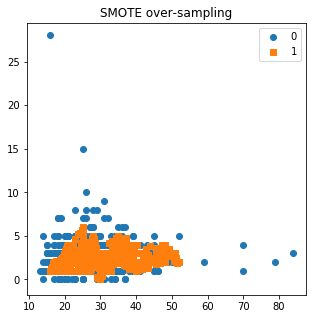

In [303]:
smote = SMOTE(ratio='minority')
X_train_smote, y_train_smote = smote.fit_sample(X, y)

plot_2d_space(X_train_smote, y_train_smote, 'SMOTE over-sampling')

In [304]:
X_test.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,Smokes_1.0,IUD_1.0,STDs_1.0,STDs:condylomatosis_1.0,STDs:vaginal condylomatosis_1.0,STDs:vulvo-perineal condylomatosis_1.0,STDs:syphilis_1.0,STDs:pelvic inflammatory disease_1.0,STDs:genital herpes_1.0,STDs:molluscum contagiosum_1.0,STDs:HIV_1.0,STDs:Hepatitis B_1.0,STDs:HPV_1.0,Dx_1,Dx:Cancer_1,Dx:CIN_1,Dx:HPV_1,Hinselmann_1,Citology_1,Smoke > 10 years_1,Been Pregnant_1,Known First Sexual Intercourse Age_1,> 1 STD_1,>10 Years Sexual Activity_1,IUD >= 5 Years_1,>= 3 Pregnancies_1,No Sexual Experience_1
144,30,2.0,17.0,1.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
774,43,4.0,16.0,3.0,28.000000,7.000000,0.0,0.0,2.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0
263,23,2.0,14.0,7.0,1.266973,0.513202,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
788,38,2.0,19.0,5.0,0.000000,0.000000,1.0,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0
847,30,3.0,22.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


<h1>UPSAMPLING

In [305]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [306]:
# separate minority and majority classes
neg_biopsy = training[training['Biopsy_1']==0]
pos_biopsy = training[training['Biopsy_1']==1]

In [307]:
from sklearn.utils import resample

In [308]:
# upsample minority
pos_biopsy_upsampled = resample(pos_biopsy,
                          replace=True, # sample with replacement
                          n_samples=len(neg_biopsy), # match number in majority class
                          random_state=23) # reproducible results

In [309]:
# combine majority and upsampled minority
upsampled = pd.concat([neg_biopsy, pos_biopsy_upsampled])

# check new class counts
upsampled['Biopsy_1'].value_counts()

1    478
0    478
Name: Biopsy_1, dtype: int64

<h1>LOGISTIC REGRESSION WITH UPSAMPLING

In [310]:
X_test.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,Smokes_1.0,IUD_1.0,STDs_1.0,STDs:condylomatosis_1.0,STDs:vaginal condylomatosis_1.0,STDs:vulvo-perineal condylomatosis_1.0,STDs:syphilis_1.0,STDs:pelvic inflammatory disease_1.0,STDs:genital herpes_1.0,STDs:molluscum contagiosum_1.0,STDs:HIV_1.0,STDs:Hepatitis B_1.0,STDs:HPV_1.0,Dx_1,Dx:Cancer_1,Dx:CIN_1,Dx:HPV_1,Hinselmann_1,Citology_1,Smoke > 10 years_1,Been Pregnant_1,Known First Sexual Intercourse Age_1,> 1 STD_1,>10 Years Sexual Activity_1,IUD >= 5 Years_1,>= 3 Pregnancies_1,No Sexual Experience_1
144,30,2.0,17.0,1.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
774,43,4.0,16.0,3.0,28.000000,7.000000,0.0,0.0,2.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0
263,23,2.0,14.0,7.0,1.266973,0.513202,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
788,38,2.0,19.0,5.0,0.000000,0.000000,1.0,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0
847,30,3.0,22.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [311]:
#logistic regression with the balanced dataset
y_train_upsample = upsampled['Biopsy_1']
X_train_upsample = upsampled.drop('Biopsy_1', axis=1)

upsampled_lr = LogisticRegression(solver='liblinear')

upsampled_lr.fit(X_train_upsample, y_train_upsample)

upsampled_pred = upsampled_lr.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

Test Accuracy score:  0.877906976744186
Test F1 score:  0.4166666666666667


In [312]:
from sklearn.metrics import confusion_matrix
#plot confusion matrix
cnf_matrix = confusion_matrix(y_test, upsampled_pred)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[287  38]
 [  4  15]]


In [313]:
print('Accuracy:',accuracy_score(y_test, upsampled_pred))
print('Precision:',precision_score(y_test, upsampled_pred))
print('Recall:', recall_score(y_test, upsampled_pred))
print('F1:', f1_score(y_test, upsampled_pred))

Accuracy: 0.877906976744186
Precision: 0.2830188679245283
Recall: 0.7894736842105263
F1: 0.4166666666666667


In [314]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [315]:
# Create logistic regression for grid search
logistic = linear_model.LogisticRegression()

In [316]:
# Create regularization penalty space for ridge and lasso
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10,]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [317]:
# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv=5, scoring='f1') 

In [318]:
# Fit grid search
model = clf_gs.fit(X_train_upsample, y_train_upsample)

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/metrics/

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

In [319]:
# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1


In [320]:
y_pred_train = model.best_estimator_.predict(X_train_upsample)

y_pred_test = model.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train_upsample, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.8741721854304636
Testing F1 Score: 0.4347826086956521


Logistic Regression with upsampling seams to be overfitting our data. This can be inferred from the Training F1 score being .95 and the test F1 score being .70. This model does not seem to generalize well to new data.

<h1>LOGISTIC REGRESSION WITH SMOTE

In [321]:
smote_lr = LogisticRegression(solver='liblinear')

smote_lr.fit(X_train_smote, y_train_smote)

smote_pred = upsampled_lr.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.877906976744186
Test F1 score:  0.4166666666666667


In [322]:
#plot confusion matrix
cnf_matrix = confusion_matrix(y_test, upsampled_pred)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[287  38]
 [  4  15]]


In [323]:
print('Accuracy:',accuracy_score(y_test, upsampled_pred))
print('Precision:',precision_score(y_test, upsampled_pred))
print('Recall:', recall_score(y_test, upsampled_pred))
print('F1:', f1_score(y_test, upsampled_pred))

Accuracy: 0.877906976744186
Precision: 0.2830188679245283
Recall: 0.7894736842105263
F1: 0.4166666666666667


In [324]:
y_pred_train_smote = model.best_estimator_.predict(X_train_smote)
y_pred_test_smote = model.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train_smote, y_pred_train_smote))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.8917197452229298
Testing F1 Score: 0.4347826086956521


We get the same results for Logistic Regression with SMOTE as we did when using upsampling. The 
model still overfits the data and does not generalize well to knew data.

<h1>KNN SMOTE

In [325]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()
clf1.fit(X_train_smote, y_train_smote)
knn_preds = clf1.predict(X_test)

In [326]:
knn_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [327]:
#check metrics for KNN
print('Accuracy:',accuracy_score(y_test, knn_preds))
print('Precision:',precision_score(y_test, knn_preds))
print('Recall:', recall_score(y_test, knn_preds))
print('F1:', f1_score(y_test, knn_preds))

Accuracy: 0.875
Precision: 0.3064516129032258
Recall: 1.0
F1: 0.46913580246913583


In [328]:
#plot confusion matrix
#KNN classifier does not make any False Negative errors 
cnf_matrix_knn = confusion_matrix(y_test, knn_preds)
print('Confusion Matrix:\n',cnf_matrix_knn)

Confusion Matrix:
 [[282  43]
 [  0  19]]


In [329]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=50):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [330]:
find_best_k(X_train_smote, y_train_smote, X_test, y_test)

Best Value for k: 1
F1-Score: 1.0


<h1>DECISION TREE

In [331]:
from sklearn.tree import DecisionTreeClassifier

In [332]:
#set params
params_dt={'criterion': ['gini','entropy'], 'max_depth': range(2,10,1), 'max_leaf_nodes': range(2,20), 'min_samples_leaf': range(50,500,50)}

#create our estimaor
clf_tree=DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree=GridSearchCV(clf_tree, params_dt,  cv=3, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10), 'max_leaf_nodes': range(2, 20), 'min_samples_leaf': range(50, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [333]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.9252604632612852
{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 50}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')


In [334]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1-Score:", metrics.f1_score(y_test, y_pred))

F1-Score: 0.5384615384615385


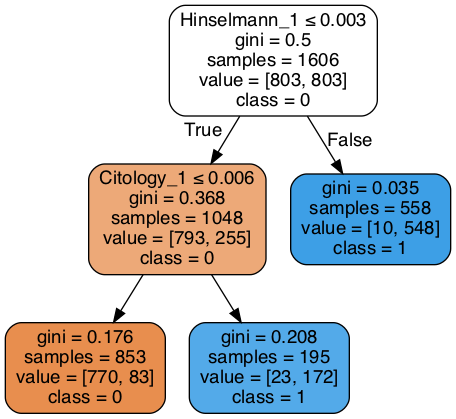

In [335]:
#view pretty tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

<h1>RANDOM FOREST SMOTE

<h2>Best Model So Far

In [336]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_smote, y_train_smote)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [337]:
forest.score(X_train_smote, y_train_smote)

0.9701120797011208

In [338]:
forest.score(X_test, y_test)

0.9767441860465116

In [339]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


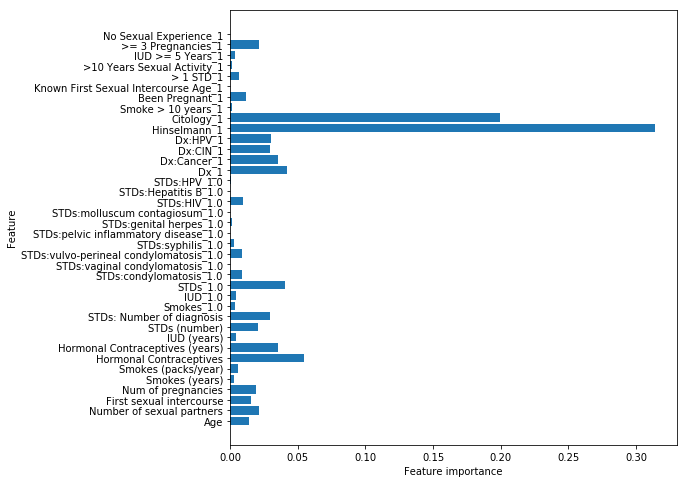

In [340]:
plot_feature_importances(forest)

In [341]:
forest_pred = forest.predict(X_test)

In [342]:
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, forest_pred))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, forest_pred))

Test Accuracy score:  0.9767441860465116
Test F1 score:  0.7894736842105263


In [343]:
#plot confusion matrix
cnf_matrix_rf_smote = confusion_matrix(y_test, forest_pred)
print('Confusion Matrix:\n',cnf_matrix_rf_smote)

Confusion Matrix:
 [[321   4]
 [  4  15]]


In [344]:
param_grid = { 
    'n_estimators': [100, 200,300,400],
    'max_features': ['auto',0.25, 0.33, 0.5 ],
    'max_depth' : [None,5,6,7,8,9,10],
    'min_samples_leaf': [0.03,0.04,0.05,0.06, 1]
}

In [345]:
from sklearn.model_selection import GridSearchCV

In [346]:
forest_2 = RandomForestClassifier()

In [347]:
CV_rfc = GridSearchCV(estimator=forest_2, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 0.25, 0.33, 0.5], 'max_depth': [None, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
CV_rfc.best_params_

In [349]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  1.0
Test F1 score:  1.0


In [350]:
#plot confusion matrix
cnf_matrix_rf_smote_CV = confusion_matrix(y_test, rfc_pred)
print('Confusion Matrix:\n',cnf_matrix_rf_smote_CV)

Confusion Matrix:
 [[325   0]
 [  0  19]]


<h1>RANDOM FOREST UPSAMPLE

In [351]:
forest_upsample = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest_upsample.fit(X_train_upsample, y_train_upsample)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [352]:
forest_upsample.score(X_train_upsample, y_train_upsample)

0.9194560669456067

In [353]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


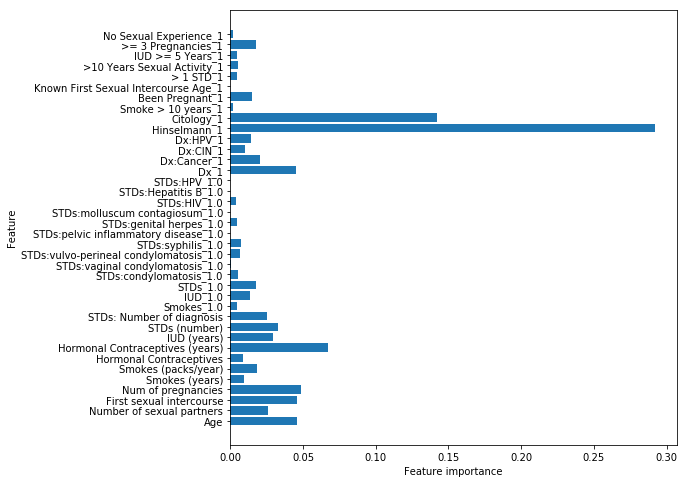

In [354]:
plot_feature_importances(forest_upsample)

In [355]:
forest_pred_upsample = forest_upsample.predict(X_test)

In [356]:
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, forest_pred_upsample))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, forest_pred_upsample))

Test Accuracy score:  0.9302325581395349
Test F1 score:  0.5200000000000001


In [357]:
#plot confusion matrix
cnf_matrix_rf_upsample = confusion_matrix(y_test, forest_pred_upsample)
print('Confusion Matrix:\n',cnf_matrix_rf_upsample)

Confusion Matrix:
 [[307  18]
 [  6  13]]


In [358]:
CV_rfc_upsample = GridSearchCV(estimator=forest_upsample, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc_upsample.fit(X_train_upsample, y_train_upsample)

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 0.25, 0.33, 0.5], 'max_depth': [None, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [359]:
CV_rfc_upsample.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [360]:
rfc_pred_upsample = CV_rfc_upsample.best_estimator_.predict(X_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred_upsample))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred_upsample))

Test Accuracy score:  0.9563953488372093
Test F1 score:  0.5945945945945946


In [361]:
#plot confusion matrix
cnf_matrix_rf_upsample = confusion_matrix(y_test, rfc_pred_upsample)
print('Confusion Matrix:\n',cnf_matrix_rf_upsample)

Confusion Matrix:
 [[318   7]
 [  8  11]]


<h1>XG BOOST

In [362]:
#create XGBoost instance
clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)

In [363]:
clf.fit(X_train_upsample, y_train_upsample)
training_preds = clf.predict(X_train_upsample)

In [364]:
val_preds = clf.predict(X_test)

In [365]:
training_accuracy = accuracy_score(y_train_upsample, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 92.89%
Validation accuracy: 93.6%


In [366]:
#train_f1 = f1_score(y_train, val_preds)
test_f1 = f1_score(y_test, val_preds)

#print("Train F1: %f" % (train_f1))
print("Test F1: %f" % (test_f1))

Test F1: 0.576923


<h2>K-FOLDS CROSS VALIDATION WITH XGBOOST

In [240]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [241]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=500,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results 

[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.612444,0.000517,0.612471,0.001235
1,0.551028,0.003692,0.550617,0.006094
2,0.499968,0.006470,0.500050,0.009803
3,0.453890,0.007380,0.454456,0.010631
4,0.417025,0.005000,0.417972,0.010412
5,0.386955,0.003366,0.388102,0.011152
6,0.361809,0.003127,0.362612,0.012106
7,0.336837,0.002923,0.338625,0.012959
8,0.315571,0.004671,0.317182,0.013711
9,0.298313,0.005177,0.300245,0.014262


In [242]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

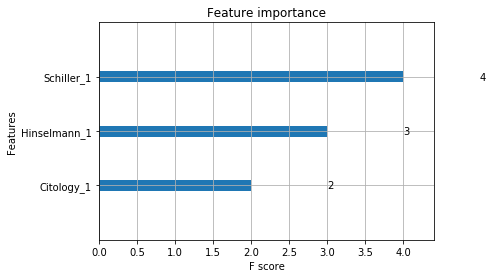

In [243]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [244]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearch1.fit(train[predictors],train[target])
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

NameError: name 'train' is not defined